Red Wine Quality Prediction Project

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import  preprocessing



Project Description
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


In [103]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv")
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [104]:
df.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [105]:
df.tail(30)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1569,6.2,0.510,0.14,1.9,0.056,15.0,34.0,0.99396,3.48,0.57,11.5,6
1570,6.4,0.360,0.53,2.2,0.230,19.0,35.0,0.99340,3.37,0.93,12.4,6
1571,6.4,0.380,0.14,2.2,0.038,15.0,25.0,0.99514,3.44,0.65,11.1,6
1572,7.3,0.690,0.32,2.2,0.069,35.0,104.0,0.99632,3.33,0.51,9.5,5
1573,6.0,0.580,0.20,2.4,0.075,15.0,50.0,0.99467,3.58,0.67,12.5,6
1574,5.6,0.310,0.78,13.9,0.074,23.0,92.0,0.99677,3.39,0.48,10.5,6
1575,7.5,0.520,0.40,2.2,0.060,12.0,20.0,0.99474,3.26,0.64,11.8,6
1576,8.0,0.300,0.63,1.6,0.081,16.0,29.0,0.99588,3.30,0.78,10.8,6
1577,6.2,0.700,0.15,5.1,0.076,13.0,27.0,0.99622,3.54,0.60,11.9,6
1578,6.8,0.670,0.15,1.8,0.118,13.0,20.0,0.99540,3.42,0.67,11.3,6


In [106]:
df.shape

(1599, 12)

In [107]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [108]:
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [109]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [110]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [112]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0

In [113]:
df["quality"]=df["quality"].replace(" ",np.nan)
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [114]:
df.iloc[480:500,:]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
480,10.6,0.280,0.39,15.5,0.069,6.0,23.0,1.0026,3.12,0.66,9.2,5
481,9.4,0.300,0.56,2.8,0.080,6.0,17.0,0.9964,3.15,0.92,11.7,8
482,10.6,0.360,0.59,2.2,0.152,6.0,18.0,0.9986,3.04,1.05,9.4,5
483,10.6,0.360,0.60,2.2,0.152,7.0,18.0,0.9986,3.04,1.06,9.4,5
484,10.6,0.440,0.68,4.1,0.114,6.0,24.0,0.9970,3.06,0.66,13.4,6
485,10.2,0.670,0.39,1.9,0.054,6.0,17.0,0.9976,3.17,0.47,10.0,5
486,10.2,0.670,0.39,1.9,0.054,6.0,17.0,0.9976,3.17,0.47,10.0,5
487,10.2,0.645,0.36,1.8,0.053,5.0,14.0,0.9982,3.17,0.42,10.0,6
488,11.6,0.320,0.55,2.8,0.081,35.0,67.0,1.0002,3.32,0.92,10.8,7
489,9.3,0.390,0.40,2.6,0.073,10.0,26.0,0.9984,3.34,0.75,10.2,6


In [115]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [116]:
df['good'] = [1 if q >= 7 else 0 for q in df['quality']]

In [117]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [118]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


In [119]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [120]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


Data Visualization

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


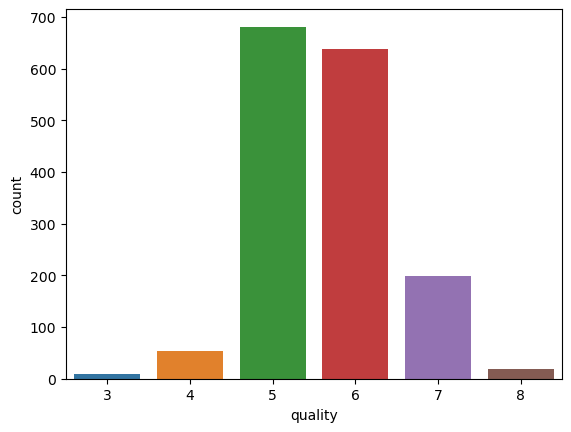

In [121]:
ax=sns.countplot(x = "quality",data=df)
print(df["quality"].value_counts())

In [122]:
#check the skewnwss
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
good                    2.129363
dtype: float64

In [123]:
cor =df.corr()
cor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.199485


<Figure size 2000x1500 with 0 Axes>

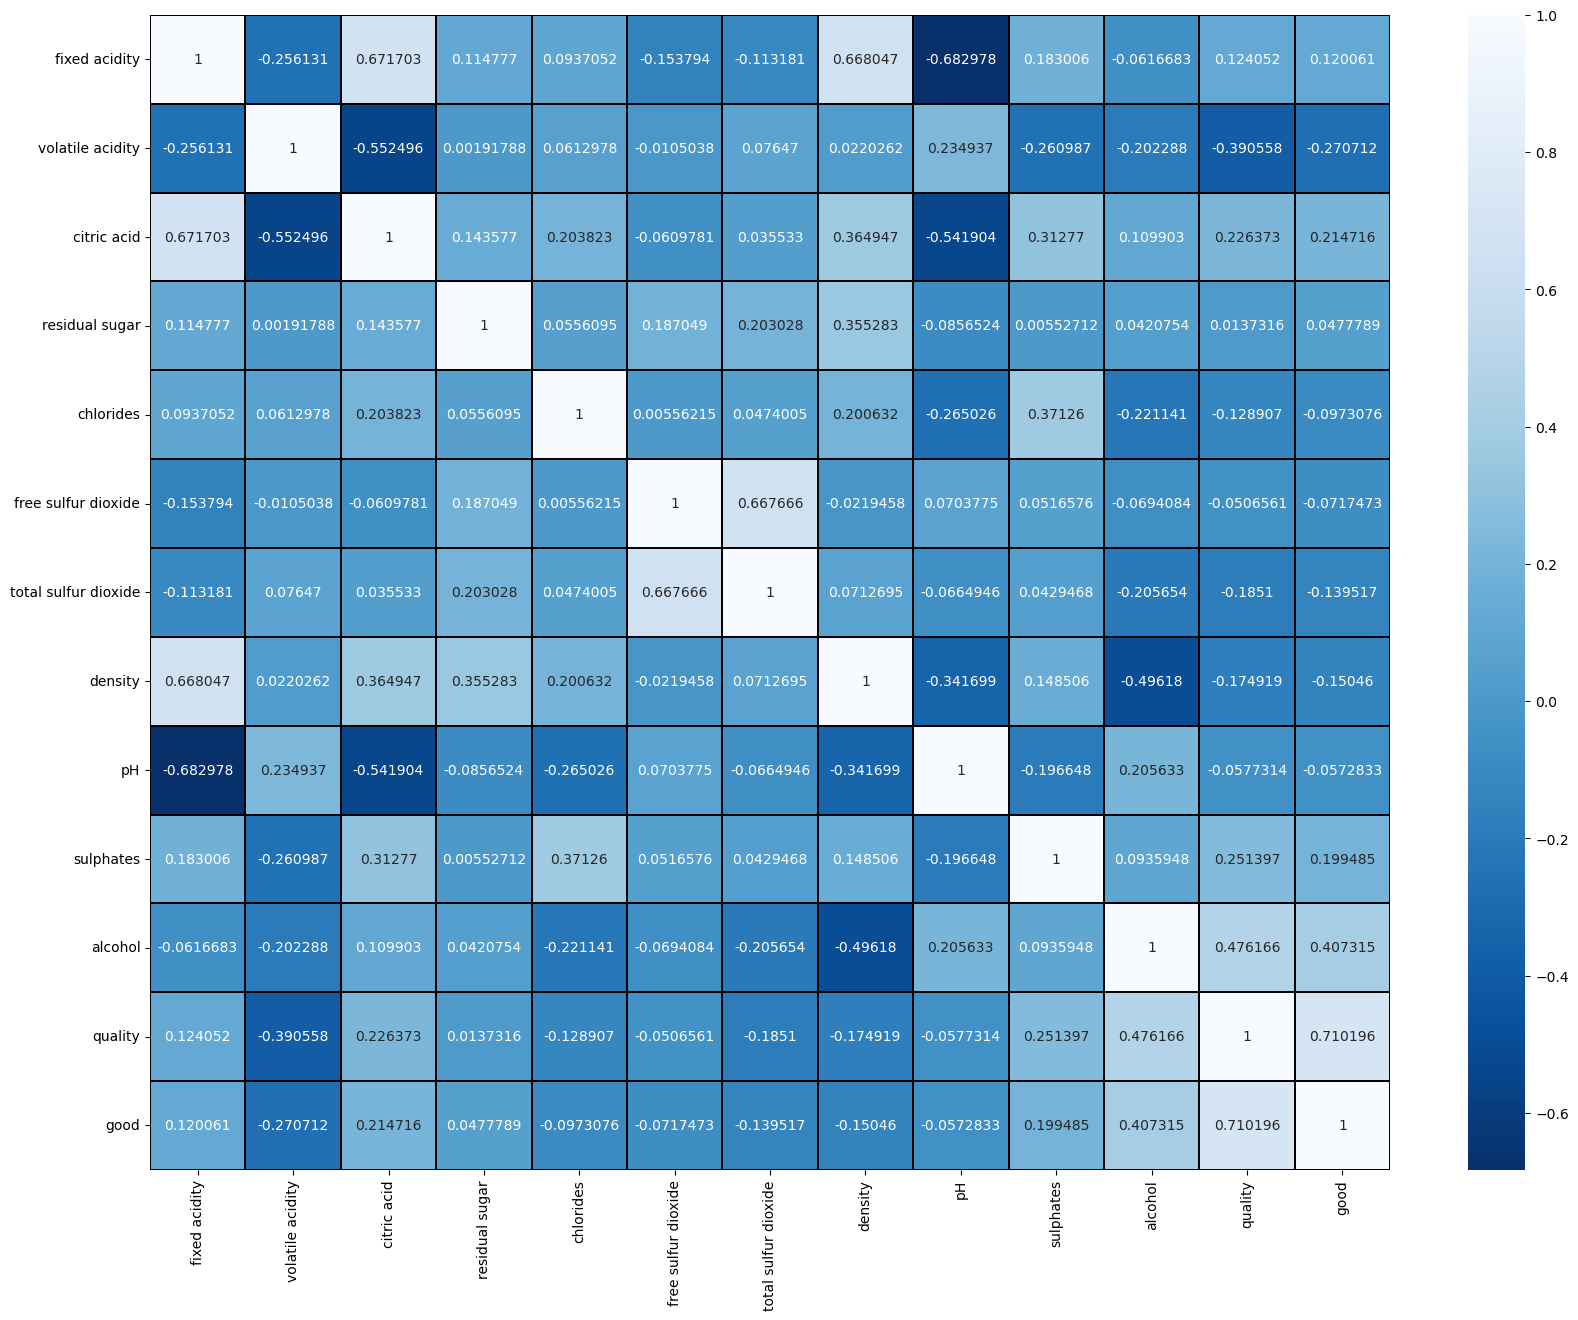

In [124]:
plt.figure(figsize=(20,15))
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths= 0.1, fmt="1g",linecolor="Black",annot=True, cmap="Blues_r")
plt.yticks(rotation=0);
plt.show()

In [125]:
X = df.iloc[:,:-2]   # exclude 'quality' and 'good' columns
y = df['good']

In [126]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [127]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: good, Length: 1599, dtype: int64

In [128]:
X_train.shape

(1119, 11)

In [129]:
X_train, X_test,y_train,y_test =train_test_split(X,y, test_size=0.3,random_state=42)

In [130]:
dtc=DecisionTreeClassifier()

In [131]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [132]:
#Scale the data
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)


In [133]:
X_train_scaled

array([[0.3539823 , 0.06849315, 0.36      , ..., 0.57480315, 0.30674847,
        0.4       ],
       [0.69911504, 0.23287671, 0.63      , ..., 0.19685039, 0.30674847,
        0.27692308],
       [0.2300885 , 0.28767123, 0.27      , ..., 0.51181102, 0.20858896,
        0.4       ],
       ...,
       [0.2300885 , 0.34246575, 0.06      , ..., 0.60629921, 0.10429448,
        0.16923077],
       [0.2920354 , 0.05479452, 0.35      , ..., 0.45669291, 0.26380368,
        0.53846154],
       [0.10619469, 0.11643836, 0.26      , ..., 0.51181102, 0.10429448,
        0.78461538]])

In [134]:
X_test_scaled

array([[0.27433628, 0.30136986, 0.08      , ..., 0.39370079, 0.17791411,
        0.18461538],
       [0.28318584, 0.26027397, 0.17      , ..., 0.51181102, 0.06748466,
        0.16923077],
       [0.53982301, 0.37671233, 0.22      , ..., 0.42519685, 0.37423313,
        0.23076923],
       ...,
       [0.18584071, 0.23287671, 0.24      , ..., 0.51181102, 0.14110429,
        0.33846154],
       [0.52212389, 0.26712329, 0.64      , ..., 0.27559055, 0.17791411,
        0.52307692],
       [0.46902655, 0.26027397, 0.24      , ..., 0.47244094, 0.09202454,
        0.24615385]])

In [135]:
#feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
selector = SelectKBest(f_classif, k=5)
X_train_new = selector.fit_transform(X_train_scaled, y_train)
X_test_new = selector.transform(X_test_scaled)
selected_features = X.columns[selector.get_support()]
print(selected_features)

Index(['volatile acidity', 'citric acid', 'density', 'sulphates', 'alcohol'], dtype='object')


In [136]:
#train the decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_new, y_train)

DecisionTreeClassifier(random_state=42)

In [137]:
y_pred = dtc.predict(X_test_new)


In [138]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,

In [139]:
#Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.8583333333333333


In [140]:
#Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.8583333333333333


Hyper Parameter Tuning

In [141]:
 #ROC AUC
roc_auc = roc_auc_score(y_test, dtc.predict_proba(X_test_new)[:,1])
print('ROC AUC:', roc_auc)

ROC AUC: 0.7426186259983376


In [143]:
import pickle

# replace DecisionTreeClassifier with the chosen model class
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# save model to a file using pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model,f) 
#saved the model from file                
with open('model.pkl', 'rb') as f:
    dtc= pickle.load(f)
